In [1]:
import pysd, pandas as pd, numpy as np
%matplotlib inline

w3 = pysd.load('world3.py')

policy_year = 1980

fromPYto2100 = np.arange(policy_year, 2100.5, .5)
from1900toPY = np.arange(1900, policy_year, .5)
bau = w3.run()

_ = w3.run(return_timestamps = from1900toPY)

In [2]:
def capacity_utilization_fraction_table(x):
    return 0.9 * pysd.functions.lookup(x, [1, 3, 5, 7, 9, 11], [1, 0.9, 0.7, 0.3, 0.1, 0.1])

w3.components.capacity_utilization_fraction_table = capacity_utilization_fraction_table

sa76_1_end = w3.run(initial_condition='current', return_timestamps = fromPYto2100, params = {
    'industrial capital output ratio':  bau['industrial capital output ratio'][policy_year] * 1.1,
    'average life of industrial capital': bau['average life of industrial capital'][policy_year] * .9,
    'fraction of industrial output allocated to consumption': bau['fraction of industrial output allocated to consumption'][policy_year] * 1.1
})

In [3]:
w3.reload()
_ = w3.run(return_timestamps = from1900toPY)

In [4]:
def capacity_utilization_fraction_table(x):
    return 1.1 * pysd.functions.lookup(x, [1, 3, 5, 7, 9, 11], [1, 0.9, 0.7, 0.3, 0.1, 0.1])

w3.components.capacity_utilization_fraction_table = capacity_utilization_fraction_table

sa76_2_end = w3.run(initial_condition='current', return_timestamps = fromPYto2100, params = {
    'industrial capital output ratio':  bau['industrial capital output ratio'][policy_year] * .9,
    'average life of industrial capital': bau['average life of industrial capital'][policy_year] * 1.1,
    'fraction of industrial output allocated to consumption': bau['fraction of industrial output allocated to consumption'][policy_year] * .9
})

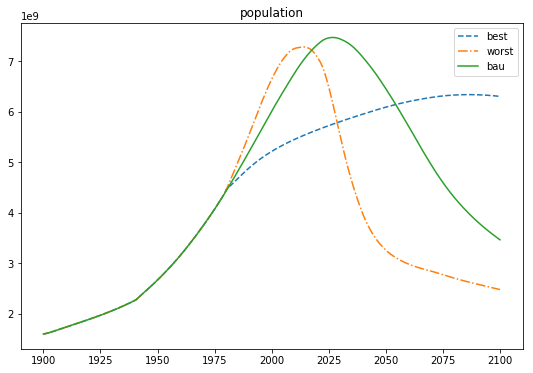

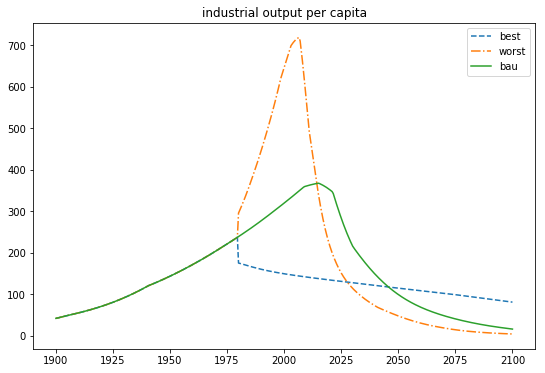

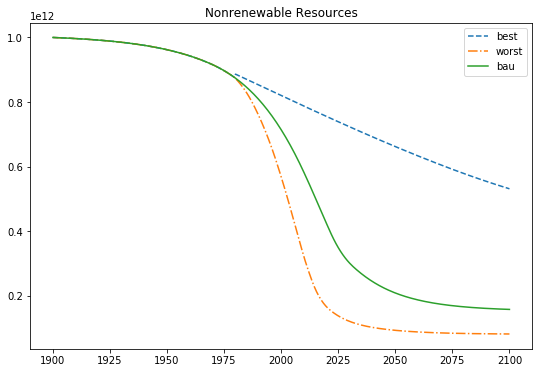

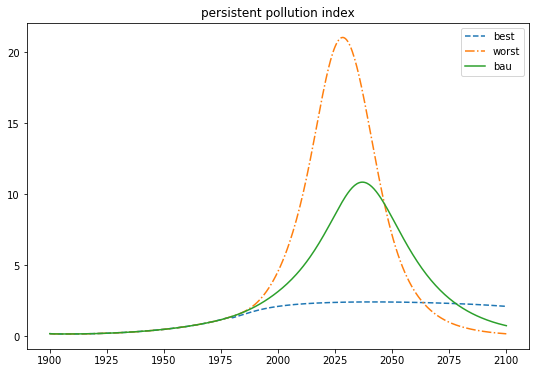

In [5]:
import matplotlib.pyplot as plt
from IPython.display import Markdown
sa76_1 = pd.concat([bau[:policy_year-.5], sa76_1_end])
sa76_2 = pd.concat([bau[:policy_year-.5], sa76_2_end])

to_disp = ['population', 'industrial output per capita', 'Nonrenewable Resources', 'persistent pollution index']

for v in to_disp:
    plt.figure(figsize=(9,6))
    plt.title(v)
    sa76_1[v].plot(label = 'best', ls = '--')
    sa76_2[v].plot(label = 'worst', ls = '-.')
    bau[v].plot(label = 'bau')
    plt.legend()
    plt.savefig(f"{v}_sa76.svg")
    plt.show()